In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

# from sklearn.pipeline import Pipeline

In [56]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

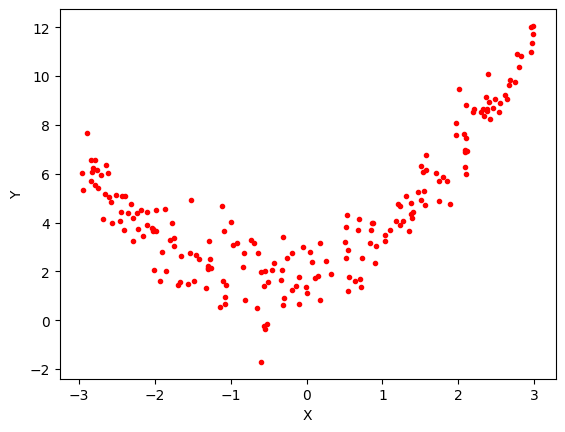

In [57]:
plt.plot(X,y,'r.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [59]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=24,include_bias=True)
# include_bias parameter

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [60]:

print(X_train[0])
print(X_train_trans[0])

[1.3089723]
[  1.           1.3089723    1.71340849   2.24280426   2.93576865
   3.84283985   5.03017093   6.58435443   8.61873758  11.28168878
  14.76741815  19.33014134  25.30261962  33.12042828  43.35372327
  56.74882299  74.28263752  97.2339151  127.27650177 166.60141563
 218.07663868 285.45627995 373.65436414 489.10321352 640.22255976]


In [61]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [62]:
y_pred= lr.predict(X_test_trans)

In [63]:
r2_score(y_test,y_pred)

0.8771605887264222

In [64]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.00000000e+00  1.64234004e-01 -1.04421621e+00  1.10317707e+01
   6.81700362e+00 -3.67644884e+01 -8.61966608e+00  5.03970694e+01
   5.51407856e+00 -3.70877578e+01 -1.85837333e+00  1.65561140e+01
   2.19092808e-01 -4.76005021e+00  6.80692183e-02  9.02941477e-01
  -3.34742208e-02 -1.12507897e-01  6.39314036e-03  8.86608235e-03
  -6.58610505e-04 -4.00841428e-04  3.60055823e-05  7.92321722e-06
  -8.21606000e-07]]
[1.86427503]


In [65]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

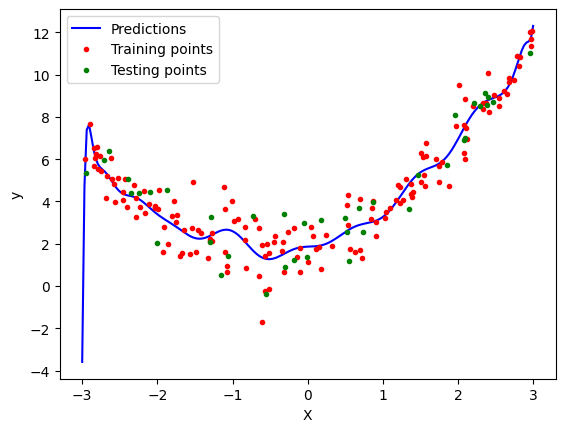

In [66]:
plt.plot(X_new, y_new, "b-", linewidth=1.5, label="Predictions")
plt.plot(X_train, y_train, "r.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Applying Gradient Descent


C:\Users\MRINMAY\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


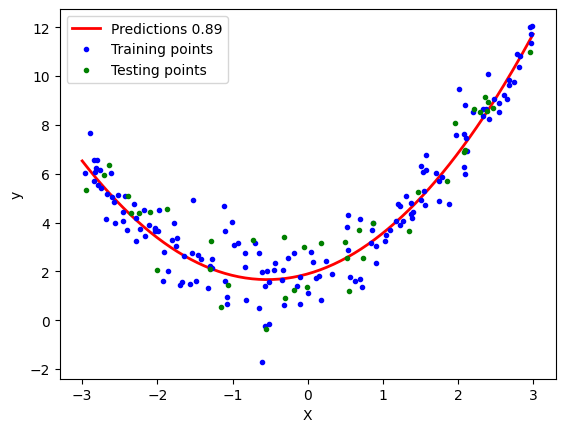

In [67]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()